In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error 
from sklearn.linear_model import LinearRegression,Ridge,Lasso  
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("Admission_Prediction.csv") 
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            485 non-null float64
TOEFL Score          490 non-null float64
University Rating    485 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.2 KB


In [4]:
df.describe() 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df["University Rating"].value_counts()

3.0    154
2.0    124
4.0    103
5.0     72
1.0     32
Name: University Rating, dtype: int64

In [6]:
# check for null values 
df.isnull().sum() 

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

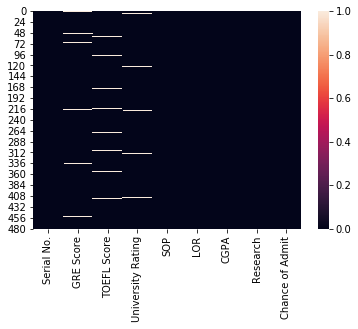

In [7]:
sns.heatmap(df.isnull(),)
plt.show()

In [8]:
# extract null columns 
null_columns = [col for col in df.columns if df[col].isnull().sum() > 0 ] 
null_columns

['GRE Score', 'TOEFL Score', 'University Rating']

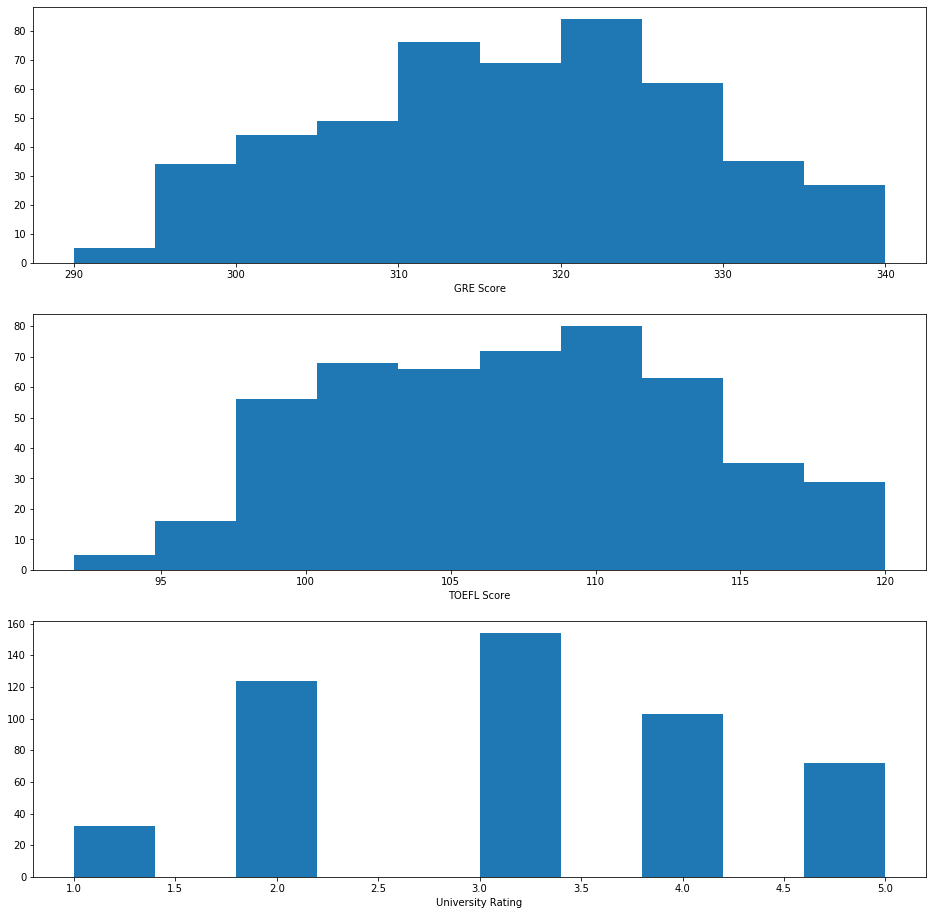

In [9]:
# ploting null columns to check distribution  of data 
plt.figure(figsize=(16,16))   
for index , col in enumerate(null_columns,1): 
    plt.subplot(3,1,index) 
    plt.hist(df[col]) 
    plt.xlabel(col)

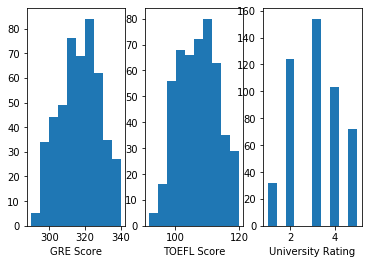

In [10]:
# ploting null columns to check distribution  of data 
# plt.figure(figsize=(25,20))    
for index , col in enumerate(null_columns,1): 
    plt.subplot(1,3,index)    
    plt.hist(df[col]) 
    plt.xlabel(col)
plt.show()

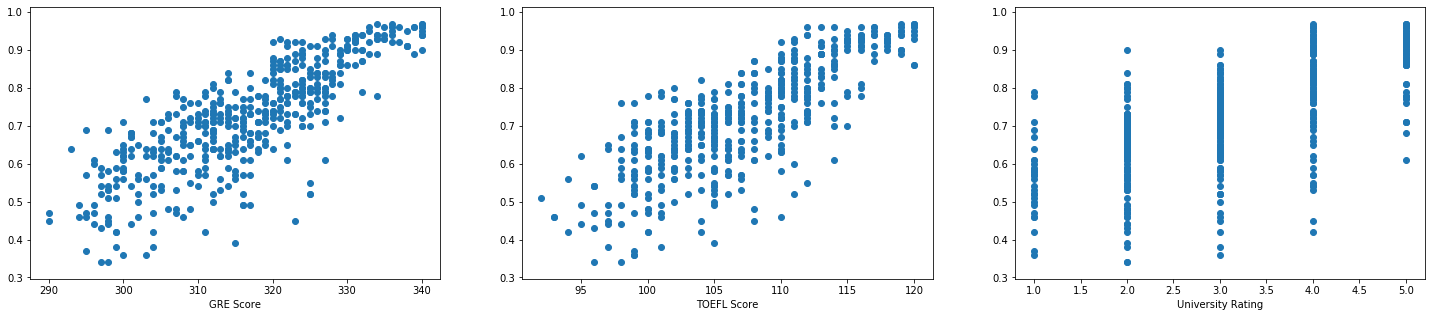

In [11]:
plt.figure(figsize=(25,5))     
for index , col in enumerate(null_columns,1): 
    plt.subplot(1,3,index)    
    plt.scatter(df[col],df['Chance of Admit'])   
    plt.xlabel(col)
plt.show()

In [12]:
df["University Rating"].value_counts() 

3.0    154
2.0    124
4.0    103
5.0     72
1.0     32
Name: University Rating, dtype: int64

In [13]:
df["University Rating"].mode()

0    3.0
dtype: float64

In [14]:
# now fill the missing value 
for index ,col in enumerate(["GRE Score","TOEFL Score"]):
    df[col].fillna(df[col].mean(),inplace=True) 

In [15]:
# here in Univercity ratting we fill mode value
df["University Rating"].fillna(df["University Rating"].mode()[0],inplace=True) 

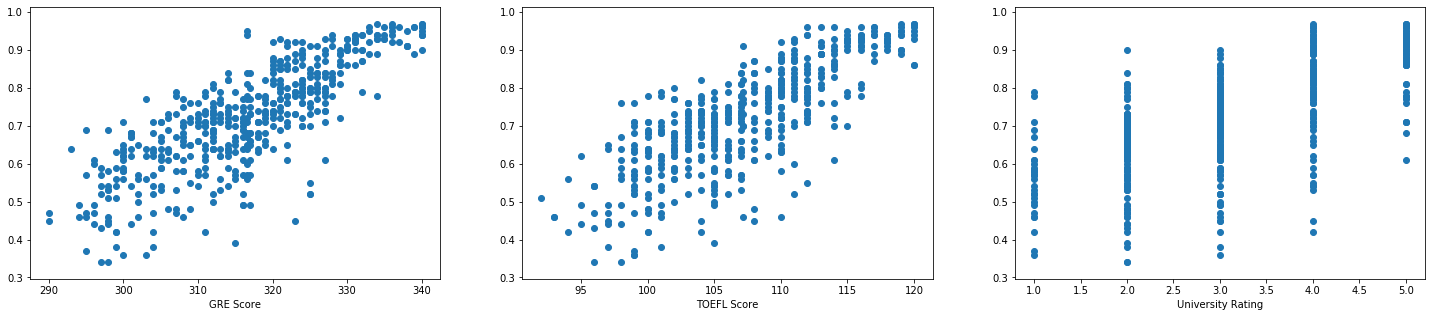

In [16]:
plt.figure(figsize=(25,5))     
for index , col in enumerate(null_columns,1): 
    plt.subplot(1,3,index)    
    plt.scatter(df[col],df['Chance of Admit'])   
    plt.xlabel(col)
plt.show()

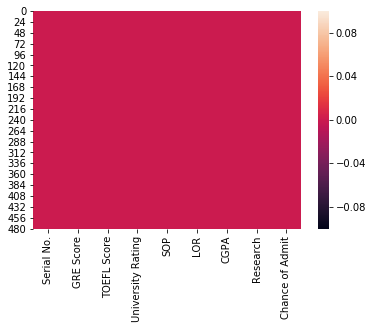

In [17]:
sns.heatmap(df.isnull())
plt.show()

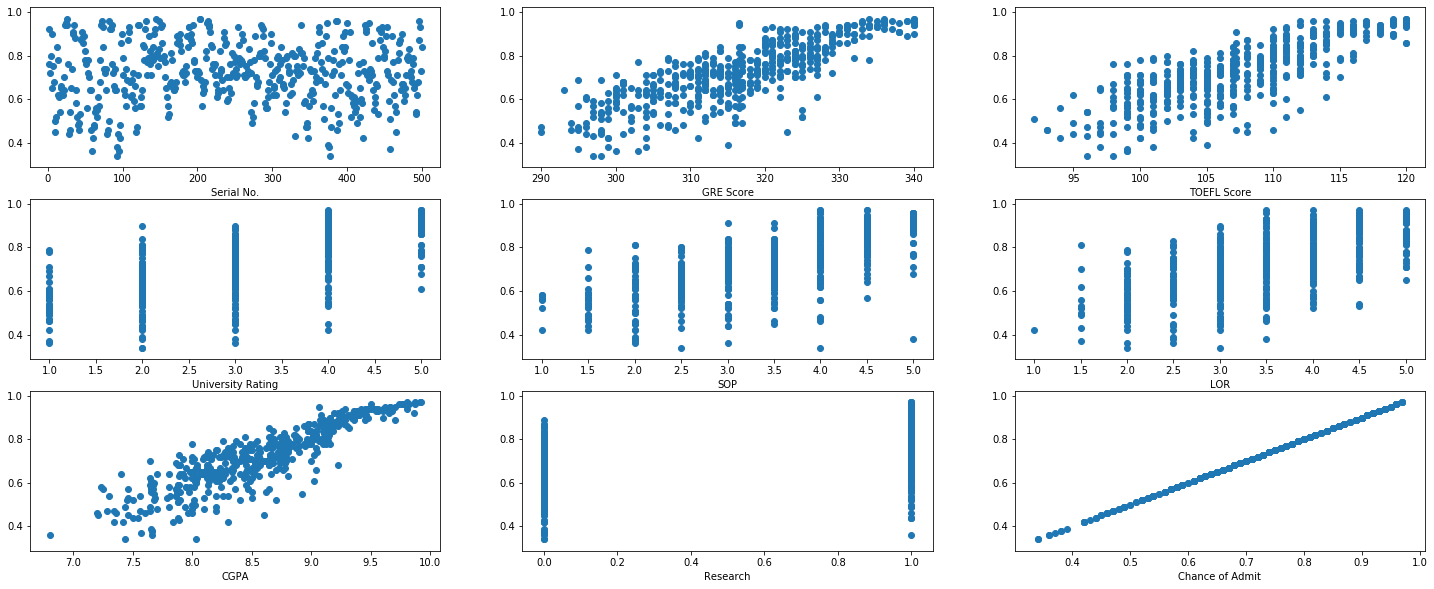

In [18]:
# now cheack all data set  distribution
plt.figure(figsize=(25,10))      
for index , col in enumerate(df,1): 
    plt.subplot(3,3,index)    
    plt.scatter(df[col],df['Chance of Admit'])   
    plt.xlabel(col)
plt.show()

In [19]:
df.Research.value_counts()

1    280
0    220
Name: Research, dtype: int64

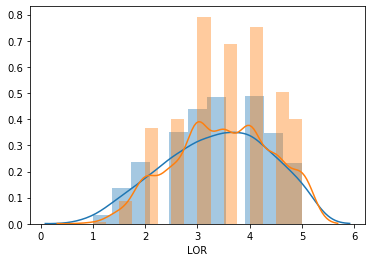

In [20]:
sns.distplot(df["SOP"])
sns.distplot(df["LOR"]) 

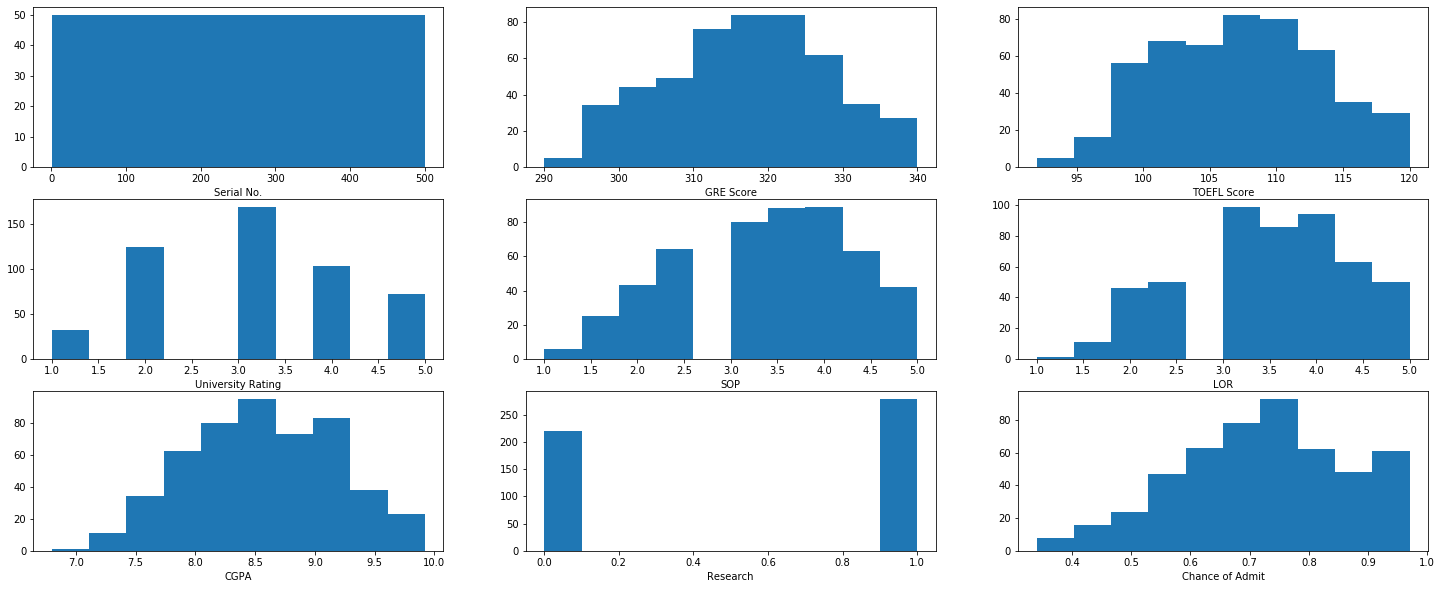

In [21]:
# now cheack all data set  distribution
plt.figure(figsize=(25,10))      
for index , col in enumerate(df,1): 
    plt.subplot(3,3,index)    
    plt.hist(df[col])   
    plt.xlabel(col)
plt.show()

In [22]:
# now check co-relation 
corelation = df.corr() 
corelation = corelation["Chance of Admit"].sort_values() 
print(corelation) 

Serial No.           0.008505
Research             0.545871
LOR                  0.645365
University Rating    0.681482
SOP                  0.684137
TOEFL Score          0.786675
GRE Score            0.802304
CGPA                 0.882413
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64


In [23]:
# now check co-relation 
corelation = df.corr() * 100 
corelation["Chance of Admit"].sort_values()

Serial No.             0.850505
Research              54.587103
LOR                   64.536451
University Rating     68.148244
SOP                   68.413652
TOEFL Score           78.667482
GRE Score             80.230351
CGPA                  88.241257
Chance of Admit      100.000000
Name: Chance of Admit, dtype: float64

In [24]:
# now we will check multicolineaity 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(df.drop(["Chance of Admit"],axis=1)) 
scaler_data = scaler.transform(df.drop(["Chance of Admit"],axis=1))

In [25]:
scaler_data

array([[-1.72859016e+00,  1.84274116e+00,  1.78854223e+00, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [-1.72166195e+00,  6.70814288e-01, -3.10581135e-02, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [-1.71473373e+00,  5.12433309e-15, -5.27312752e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.71473373e+00,  1.21170361e+00,  2.11937866e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [ 1.72166195e+00, -4.10964364e-01, -6.92730965e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 1.72859016e+00,  9.41258951e-01,  9.61451165e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [26]:
variables = scaler_data
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["featues"] = [i for i in df.columns if i != "Chance of Admit"] 

In [27]:
vif 

,VIF,featues
0,1.054547,Serial No.
1,4.153932,GRE Score
2,3.836503,TOEFL Score
3,2.525857,University Rating
4,2.840265,SOP
5,2.057573,LOR
6,4.666861,CGPA
7,1.463617,Research


In [28]:
# so here no multi colinearity in our data set 

In [29]:
X = df.drop(['Serial No.','Chance of Admit'],axis=1)  
Y = df["Chance of Admit"]

In [30]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0


In [31]:
Y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [32]:
def create_model(model,X_train, X_test, Y_train, Y_test): 
        model.fit(X_train,Y_train)
        r2 = model.score(X_test,Y_test)   
        y_pred = model.predict(X_test) 
        mse = mean_squared_error(Y_test,y_pred)  
        rmse = np.sqrt(mse)  
        n = X_test.shape[0] 
        p = X_test.shape[1]
        adj_score = 1 - (((1-r2) * (n-1))/(n-p-1))  
        return r2,mse,rmse,adj_score,model  

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 

In [34]:
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)
X_train_poly.shape, X_test_poly.shape

((335, 36), (165, 36))

In [87]:
def disp(r2_score ,mse, rmse, adj_score,model):
    print(f"Mean square error is :- {mse}  ",)
    print(f"r2_score is :- {r2_score} ") 
    print(f"Root  mean square error  is :-  {rmse}")
    print(f"Adj_R_square is :- {adj_score } ")
    l1 = []
    for word in str(model):
        if word == '(':
            break    
        l1.append(word) 
    print("Model is :-  ",''.join(l1))   


#     for col, val in zip(['r2_score','mse','rmse','adj_score',''.join(l1)],[r2_score ,mse, rmse, adj_score,model]):  
#         print(col,val)  
    

In [88]:
r2_score ,mse, rmse, adj_score,model = create_model(LinearRegression(),X_train, X_test, y_train, y_test)   
disp(r2_score ,mse, rmse, adj_score,model)


Mean square error is :- 0.003628429192973137  
r2_score is :- 0.8238917379378485 
Root  mean square error  is :-  0.0602364440598309
Adj_R_square is :- 0.8160397772089628 
Model is :-   LinearRegression


In [90]:
r2_score ,mse, rmse, adj_score,model = create_model(Ridge(),X_train, X_test, y_train, y_test)   
disp(r2_score ,mse, rmse, adj_score,model)

Mean square error is :- 0.0036292046079997734  
r2_score is :- 0.8238541026457 
Root  mean square error  is :-  0.06024288014363003
Adj_R_square is :- 0.816000463910158 
Model is :-   Ridge


In [93]:
for i in range(1,20):   
    r2_score ,mse, rmse, adj_score,model = create_model(Ridge(alpha=float(i)),X_train, X_test, y_train, y_test)       
    disp(r2_score ,mse, rmse, adj_score,model)
    print('-'*25)  

Mean square error is :- 0.0036292046079997734  
r2_score is :- 0.8238541026457 
Root  mean square error  is :-  0.06024288014363003
Adj_R_square is :- 0.816000463910158 
Model is :-   Ridge
-------------------------
Mean square error is :- 0.0036336012338960538  
r2_score is :- 0.8236407094376884 
Root  mean square error  is :-  0.06027935993270046
Adj_R_square is :- 0.8157775563552924 
Model is :-   Ridge
-------------------------
Mean square error is :- 0.0036408609795247258  
r2_score is :- 0.823288352779288 
Root  mean square error  is :-  0.06033954739244177
Adj_R_square is :- 0.8154094895274091 
Model is :-   Ridge
-------------------------
Mean square error is :- 0.0036503809902942957  
r2_score is :- 0.8228262926253544 
Root  mean square error  is :-  0.060418382883806944
Adj_R_square is :- 0.8149268279653384 
Model is :-   Ridge
-------------------------
Mean square error is :- 0.0036616793330636736  
r2_score is :- 0.8222779199264602 
Root  mean square error  is :-  0.0605118

In [94]:
for i in range(1,20):   
    r2_score ,mse, rmse, adj_score,model = create_model(Lasso(alpha=float(i)),X_train, X_test, y_train, y_test)       
    disp(r2_score ,mse, rmse, adj_score,model)
    print('-'*25)  

Mean square error is :- 0.016173035190388266  
r2_score is :- 0.21503081135904079 
Root  mean square error  is :-  0.12717324872153052
Adj_R_square is :- 0.1800321851139025 
Model is :-   Lasso
-------------------------
Mean square error is :- 0.020779518553771168  
r2_score is :- -0.008547970587327258 
Root  mean square error  is :-  0.14415102689114348
Adj_R_square is :- -0.053515077556189006 
Model is :-   Lasso
-------------------------
Mean square error is :- 0.020779518553771168  
r2_score is :- -0.008547970587327258 
Root  mean square error  is :-  0.14415102689114348
Adj_R_square is :- -0.053515077556189006 
Model is :-   Lasso
-------------------------
Mean square error is :- 0.020779518553771168  
r2_score is :- -0.008547970587327258 
Root  mean square error  is :-  0.14415102689114348
Adj_R_square is :- -0.053515077556189006 
Model is :-   Lasso
-------------------------
Mean square error is :- 0.020779518553771168  
r2_score is :- -0.008547970587327258 
Root  mean square er

# Polynomial model

In [100]:
r2_score ,mse, rmse, adj_score,model = create_model(LinearRegression(),X_train_poly, X_test_poly, y_train, y_test)       
disp(r2_score ,mse, rmse, adj_score,model)

Mean square error is :- 0.005717319276273558  
r2_score is :- 0.7225060465975508 
Root  mean square error  is :-  0.07561295706605818
Adj_R_square is :- 0.644460872203112 
Model is :-   LinearRegression


In [106]:
r2_score ,mse, rmse, adj_score,model = create_model(LinearRegression(),X_train, X_test, y_train, y_test)   
disp(r2_score ,mse, rmse, adj_score,model)

Mean square error is :- 0.003628429192973137  
r2_score is :- 0.8238917379378485 
Root  mean square error  is :-  0.0602364440598309
Adj_R_square is :- 0.8160397772089628 
Model is :-   LinearRegression


In [115]:
import pickle   
# file_name = 'lin_model.pkl'      
# with open('lin_model.pkl','rb') as f:
#     pickle.dump(model,f)   
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
    

In [126]:
loaded_model = pickle.load(open(filename, 'rb'))   
output = loaded_model.predict([X_test.iloc[0]]) 
output[0]   


0.9172095207717399